In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from src.FGWAlign import *
import warnings
warnings.filterwarnings("ignore")

# This example is same as Figures 1 and 2 in our manuscript
# Create graph g with 4 nodes
# Nodes u1, u2 have label 0 (represented as lightgray)
# Nodes u3, u4 have label 1 (represented as white with hatching)
g = nx.Graph()
g.add_nodes_from([
    ('u1', {'label': 0}),
    ('u2', {'label': 0}),
    ('u3', {'label': 1}),
    ('u4', {'label': 1})
])
g.add_edges_from([('u1', 'u2'), ('u1', 'u3'), ('u2', 'u3'), ('u3', 'u4')])

# Create graph h with 5 nodes
# Nodes v1, v2, v3, v4 have label 0 (represented as lightgray)
# Node v5 has label 1 (represented as white with hatching)
h = nx.Graph()
h.add_nodes_from([
    ('v1', {'label': 0}),
    ('v2', {'label': 0}),
    ('v3', {'label': 0}),
    ('v4', {'label': 0}),
    ('v5', {'label': 1})
])
h.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v2', 'v3'), ('v3', 'v4'), ('v3', 'v5'), ('v4', 'v5')])

# Print graph information
print("Graph g:")
print(g.nodes(data=True))
print(g.edges())

print("\nGraph h:")
print(h.nodes(data=True))
print(h.edges())

# Convert graphs to tensor format for GED calculation
g_adj = torch.tensor(nx.to_numpy_array(g)).float()
g_labels = torch.tensor([g.nodes[node]['label'] for node in g.nodes()]).float()

h_adj = torch.tensor(nx.to_numpy_array(h)).float()
h_labels = torch.tensor([h.nodes[node]['label'] for node in h.nodes()]).float()

# Print tensors
print("Graph g adjacency matrix:")
print(g_adj)
print("\nGraph g labels:")
print(g_labels)

print("\nGraph h adjacency matrix:")
print(h_adj)
print("\nGraph h labels:")
print(h_labels)

# Calculate graph edit distance and alignment matrix
distance, alignmat = FGWAlign(g_adj, h_adj, g_labels, h_labels)
print("\nGraph edit distance:", distance)

Graph g:
[('u1', {'label': 0}), ('u2', {'label': 0}), ('u3', {'label': 1}), ('u4', {'label': 1})]
[('u1', 'u2'), ('u1', 'u3'), ('u2', 'u3'), ('u3', 'u4')]

Graph h:
[('v1', {'label': 0}), ('v2', {'label': 0}), ('v3', {'label': 0}), ('v4', {'label': 0}), ('v5', {'label': 1})]
[('v1', 'v2'), ('v1', 'v3'), ('v2', 'v3'), ('v3', 'v4'), ('v3', 'v5'), ('v4', 'v5')]
Graph g adjacency matrix:
tensor([[0., 1., 1., 0.],
        [1., 0., 1., 0.],
        [1., 1., 0., 1.],
        [0., 0., 1., 0.]])

Graph g labels:
tensor([0., 0., 1., 1.])

Graph h adjacency matrix:
tensor([[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 1., 1.],
        [0., 0., 1., 0., 1.],
        [0., 0., 1., 1., 0.]])

Graph h labels:
tensor([0., 0., 0., 0., 1.])


INFO:src.FGWAlign:Final GED: 4.0.



Graph edit distance: 4.0


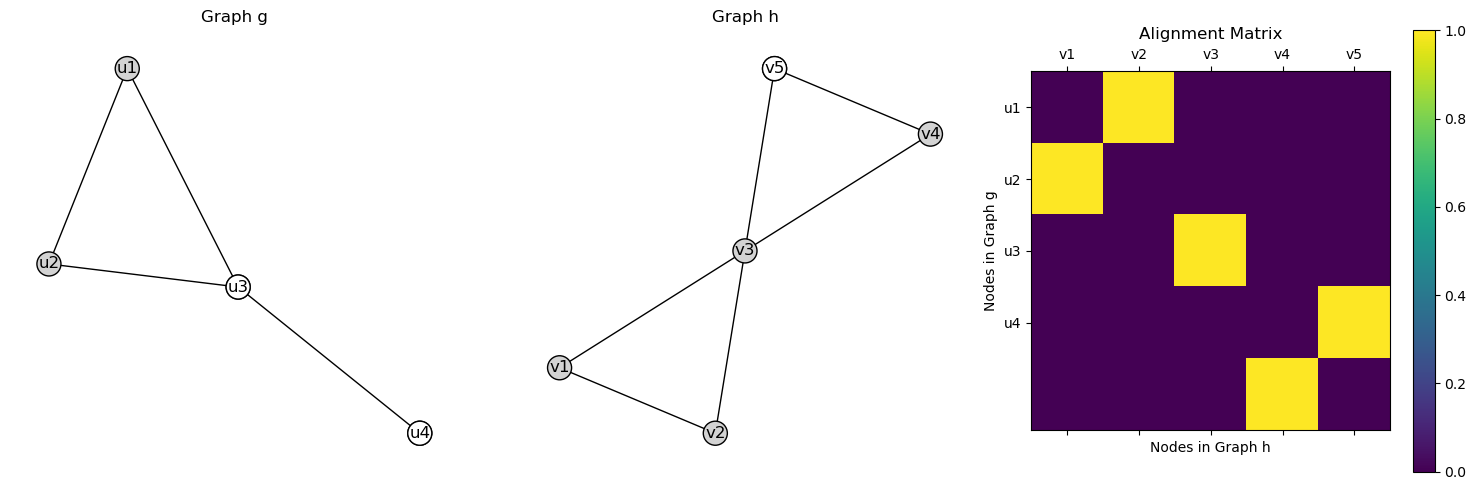

In [4]:
# Create a figure with 3 subplots: two for graphs and one for alignment matrix
plt.figure(figsize=(15, 5))

# Plot graph g
plt.subplot(131)
pos_g = nx.spring_layout(g)
nx.draw_networkx_edges(g, pos_g, edge_color='black')
nx.draw_networkx_labels(g, pos_g)

# Color nodes based on their labels
node_colors = ['lightgray' if g.nodes[node]['label'] == 0 else 'white' for node in g.nodes()]
nx.draw_networkx_nodes(g, pos_g, node_color=node_colors, edgecolors='black')

# Add hatching to nodes with label 1
hatches = ['//' if g.nodes[node]['label'] == 1 else None for node in g.nodes()]
for node, hatch in zip(g.nodes(), hatches):
    if hatch:
        plt.scatter(*pos_g[node], s=300, facecolors='none', edgecolors='black', hatch=hatch)

plt.title('Graph g')
plt.axis('off')

# Plot graph h
plt.subplot(132)
pos_h = nx.spring_layout(h)
nx.draw_networkx_edges(h, pos_h, edge_color='black')
nx.draw_networkx_labels(h, pos_h)

node_colors = ['lightgray' if h.nodes[node]['label'] == 0 else 'white' for node in h.nodes()]
nx.draw_networkx_nodes(h, pos_h, node_color=node_colors, edgecolors='black')

hatches = ['//' if h.nodes[node]['label'] == 1 else None for node in h.nodes()]
for node, hatch in zip(h.nodes(), hatches):
    if hatch:
        plt.scatter(*pos_h[node], s=300, facecolors='none', edgecolors='black', hatch=hatch)

plt.title('Graph h')
plt.axis('off')

# Plot alignment matrix
plt.subplot(133)
im = plt.matshow(alignmat.detach().numpy(), fignum=False)
plt.colorbar(im)
plt.title('Alignment Matrix')
plt.xlabel('Nodes in Graph h')
plt.ylabel('Nodes in Graph g')

# Add node labels to alignment matrix
g_nodes = list(g.nodes())
h_nodes = list(h.nodes())
plt.xticks(range(len(h_nodes)), h_nodes)
plt.yticks(range(len(g_nodes)), g_nodes)

plt.tight_layout()
plt.show()